# Analysis of the internal features of rent data

The data frame is from domain website and was gotten by API. 

This notebook shows the internal features of rent data.

In [60]:
import pandas as pd

# Read data
rent = pd.read_csv("../rent_data/renew(final).csv")

# See data
rent

,Unnamed: 0,price,state,propertyType,bathrooms,bedrooms,carspaces,region,suburb,postcode,dateListed,listingSlug,latitude,longitude
0,0,240.0,VIC,ApartmentUnitFlat,1.0,1.0,1,Melbourne Region,ELWOOD,3184,2022-09-12T17:48:43,7-23-bendigo-avenue-elwood-vic-3184-16085426,-37.885467,144.983170
1,1,690.0,VIC,Duplex,2.0,3.0,2,Melbourne Region,CAULFIELD SOUTH,3162,2022-09-12T17:36:10,1-12-omar-street-caulfield-south-vic-3162-1608...,-37.890450,145.019791
2,2,385.0,VIC,ApartmentUnitFlat,1.0,1.0,0,Melbourne Region,SOUTHBANK,3006,2022-09-12T17:32:37,602-250-city-road-southbank-vic-3006-16085393,-37.825733,144.959671
3,3,585.0,VIC,House,2.0,4.0,2,Melbourne Region,DROMANA,3936,2022-09-12T17:21:09,26-william-street-dromana-vic-3936-16085361,-38.330800,144.973984
4,4,450.0,VIC,ApartmentUnitFlat,1.0,2.0,2,Melbourne Region,MONTMORENCY,3094,2022-09-12T17:18:52,2-14-binns-street-montmorency-vic-3094-16085351,-37.716026,145.122162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2071,1000.0,VIC,Townhouse,3.0,3.0,3,Eastern Suburbs,MONT ALBERT,3127,2022-08-22T15:57:33,1-803-whitehorse-road-mont-albert-vic-3127-160...,-37.816353,145.111465
1294,2072,430.0,VIC,House,1.0,2.0,1,Melbourne Region,BRUNSWICK WEST,3055,2022-08-22T15:51:11,715-5-olive-york-way-brunswick-west-vic-3055-1...,-37.758736,144.939041
1295,2073,440.0,VIC,House,2.0,4.0,2,Melbourne Region,DEANSIDE,3336,2022-08-22T15:45:02,19-amreli-st-deanside-vic-3336-15176030,-37.738228,144.703522
1296,2074,680.0,VIC,Townhouse,2.0,2.0,2,Melbourne Region,BLACK ROCK,3193,2022-08-22T15:18:16,4-31-bayview-crescent-black-rock-vic-3193-1605...,-37.968330,145.016400


### Data Pre-processing

In [61]:
# initial number of rows
df_initial = rent.shape[0]
df_initial

1298

In [62]:
# Drop rows with missing values
rent.isnull().sum()

Unnamed: 0      0
price           7
state           0
propertyType    0
bathrooms       0
bedrooms        0
carspaces       0
region          0
suburb          0
postcode        0
dateListed      0
listingSlug     0
latitude        0
longitude       0
dtype: int64

In [63]:
# remove rows with missing values
rent = rent.dropna().reset_index(drop=True)

# check number of rows after removing missing values
rent.shape[0]

1291

In [64]:
# Check whether the data is positive or not
rent = rent[rent.price > 0]
rent = rent[rent.bedrooms > 0]
rent = rent[rent.bathrooms > 0]
rent = rent[rent.carspaces >= 0]
rent.shape[0]

1287

In [65]:
# change the number of bathrooms and bedrooms to int
rent.bathrooms = rent.bathrooms.astype(int)
rent.bedrooms = rent.bedrooms.astype(int)

# check
rent.head()

,Unnamed: 0,price,state,propertyType,bathrooms,bedrooms,carspaces,region,suburb,postcode,dateListed,listingSlug,latitude,longitude
0,0,240.0,VIC,ApartmentUnitFlat,1,1,1,Melbourne Region,ELWOOD,3184,2022-09-12T17:48:43,7-23-bendigo-avenue-elwood-vic-3184-16085426,-37.885467,144.983170
1,1,690.0,VIC,Duplex,2,3,2,Melbourne Region,CAULFIELD SOUTH,3162,2022-09-12T17:36:10,1-12-omar-street-caulfield-south-vic-3162-1608...,-37.890450,145.019791
2,2,385.0,VIC,ApartmentUnitFlat,1,1,0,Melbourne Region,SOUTHBANK,3006,2022-09-12T17:32:37,602-250-city-road-southbank-vic-3006-16085393,-37.825733,144.959671
3,3,585.0,VIC,House,2,4,2,Melbourne Region,DROMANA,3936,2022-09-12T17:21:09,26-william-street-dromana-vic-3936-16085361,-38.330800,144.973984
4,4,450.0,VIC,ApartmentUnitFlat,1,2,2,Melbourne Region,MONTMORENCY,3094,2022-09-12T17:18:52,2-14-binns-street-montmorency-vic-3094-16085351,-37.716026,145.122162


In [66]:
# drop the row with high price
rent = rent[rent.price < 2000]

# check
rent.shape[0]

1220

In [67]:
# save the data as csv
# rent.to_csv("../rent_data/rent_cleaned.csv", index=False)

In [68]:
# select only the columns we need
cols = ["price", "bedrooms", "bathrooms", "carspaces", "propertyType"]

## Part 1: Correlation

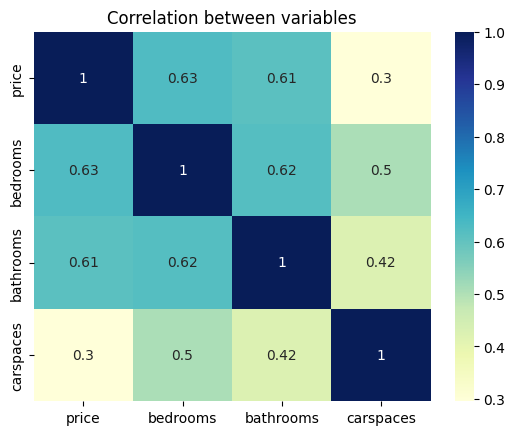

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data to see the correlation
pcm = sns.heatmap(rent[cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between variables")
plt.savefig("../plots/interal_correlation.png")
plt.show()

## Part 2 - Basic Summary

### 1 - The influence of number of bedrooms

In [70]:
# get the different data with different number of bedrooms
rent_1bedroom = rent[rent.bedrooms == 1]
rent_2bedroom = rent[rent.bedrooms == 2]
rent_3bedroom = rent[rent.bedrooms == 3]
rent_4bedroom = rent[rent.bedrooms == 4]
rent_5bedroom = rent[rent.bedrooms == 5]
rent_6bedroom = rent[rent.bedrooms == 6]
rent_7bedroom = rent[rent.bedrooms == 7]

In [71]:
# check the number of rows
print(rent_1bedroom.shape[0])
print(rent_2bedroom.shape[0])
print(rent_3bedroom.shape[0])
print(rent_4bedroom.shape[0])
print(rent_5bedroom.shape[0])
print(rent_6bedroom.shape[0])
print(rent_7bedroom.shape[0])

266
553
283
103
11
3
1


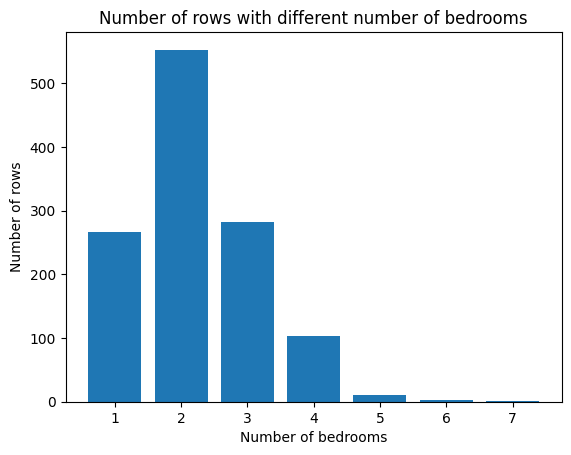

In [72]:
# plot the different bedrooms data
import matplotlib.pyplot as plt

bedrooms = [1, 2, 3, 4, 5, 6, 7]
bedrooms_shape = [rent_1bedroom.shape[0], rent_2bedroom.shape[0], rent_3bedroom.shape[0], 
                  rent_4bedroom.shape[0], rent_5bedroom.shape[0], rent_6bedroom.shape[0], 
                  rent_7bedroom.shape[0]]

plt.bar(bedrooms, bedrooms_shape)
plt.xlabel("Number of bedrooms")
plt.ylabel("Number of rows")
plt.title("Number of rows with different number of bedrooms")
plt.savefig("../plots/internal_distribution/distribution1.png")
plt.show()

In [73]:
# get the mean price of different number of bedrooms
mean1 = rent_1bedroom["price"].mean()
mean2 = rent_2bedroom["price"].mean()
mean3 = rent_3bedroom["price"].mean()
mean4 = rent_4bedroom["price"].mean()
mean5 = rent_5bedroom["price"].mean()
mean6 = rent_6bedroom["price"].mean()
mean7 = rent_7bedroom["price"].mean()

# create a list of mean price
mean_list = [mean1, mean2, mean3, mean4, mean5, mean6, mean7]
mean_list

[396.33458646616543,
 527.493670886076,
 727.8445229681979,
 921.8932038834952,
 939.5454545454545,
 1433.3333333333333,
 1400.0]

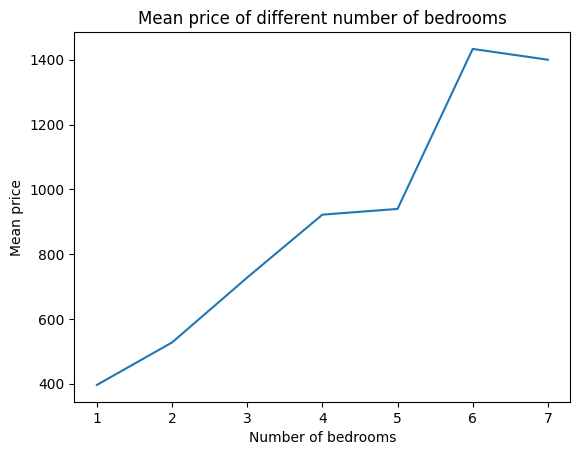

In [74]:
# plot the mean price of different number of bedrooms
plt.plot(bedrooms, mean_list)
plt.xlabel("Number of bedrooms")
plt.ylabel("Mean price")
plt.title("Mean price of different number of bedrooms")
plt.savefig("../plots/mean_price/mean_price1.png")
plt.show()

In [75]:
import statistics

median1 = statistics.median(rent_1bedroom["price"])
median2 = statistics.median(rent_2bedroom["price"])
median3 = statistics.median(rent_3bedroom["price"])
median4 = statistics.median(rent_4bedroom["price"])
median5 = statistics.median(rent_5bedroom["price"])
median6 = statistics.median(rent_6bedroom["price"])
median7 = statistics.median(rent_7bedroom["price"])

median_list = [median1, median2, median3, median4, median5, median6, median7]
median_list

[395.0, 500.0, 670.0, 880.0, 850.0, 1250.0, 1400.0]

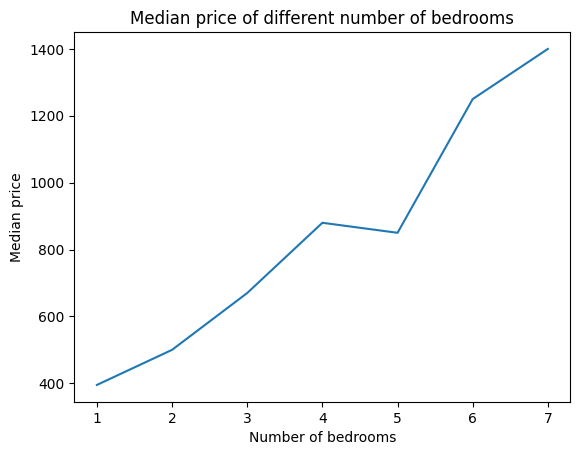

In [76]:
# plot the median price of different number of bedrooms
plt.plot(bedrooms, median_list)
plt.xlabel("Number of bedrooms")
plt.ylabel("Median price")
plt.title("Median price of different number of bedrooms")
plt.savefig("../plots/median_price/median_price1.png") 
plt.show()

In [77]:
def growth_rate (past, present):
    """
    This function takes in a dataframe and a column name
    and returns the growth rate of the column
    """
    # get the growth rate
    growth_rate = (present - past) / past
    
    return growth_rate

# get the growth rate
rate1 = growth_rate(mean1, mean2)
rate2 = growth_rate(mean2, mean3)
rate3 = growth_rate(mean3, mean4)
rate4 = growth_rate(mean4, mean5)
rate5 = growth_rate(mean5, mean6)
rate6 = growth_rate(mean6, mean7)
growth_rate_list = [rate1, rate2, rate3, rate4, rate5, rate6]

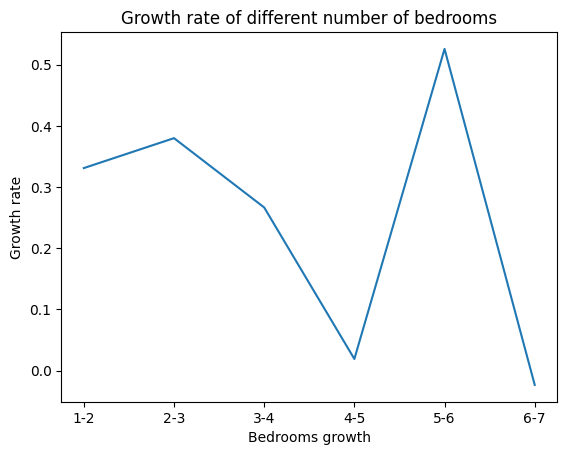

In [78]:
# plot the growth rate
growth_cols = ["1-2", "2-3", "3-4", "4-5", "5-6", "6-7"]
plt.plot(growth_cols, growth_rate_list)
plt.xlabel("Bedrooms growth")
plt.ylabel("Growth rate")
plt.title("Growth rate of different number of bedrooms")
plt.savefig("../plots/growth_rate/growth_rate1.png")
plt.show()

In [79]:
# Past several years data
# Data from https://www.dffh.vic.gov.au/moving-annual-rents-suburb-june-quarter-2022-excel

# xlsx = pd.ExcelFile("../data/raw/rental.xlsx")

# bedroom1_flat = pd.read_excel(xlsx, "1 bedroom flat")
# bedroom2_flat = pd.read_excel(xlsx, "2 bedroom flat")
# bedroom3_flat = pd.read_excel(xlsx, "3 bedroom flat")
# bedroom2_house = pd.read_excel(xlsx, "2 bedroom house")
# bedroom3_house = pd.read_excel(xlsx, "3 bedroom house")
# bedroom4_house = pd.read_excel(xlsx, "4 bedroom house")

### 2 - The influence of bathrooms

In [80]:
# get the different data with different number of bathrooms
rent_1bathroom = rent[rent.bathrooms == 1]
rent_2bathroom = rent[rent.bathrooms == 2]
rent_3bathroom = rent[rent.bathrooms == 3]
rent_4bathroom = rent[rent.bathrooms == 4]

# check there are not too many bathrooms
rent_bathroom = rent[rent.bathrooms > 4]

print(rent_1bathroom.shape[0], rent_2bathroom.shape[0], rent_3bathroom.shape[0], rent_4bathroom.shape[0], rent_bathroom.shape[0])

781 386 48 5 0


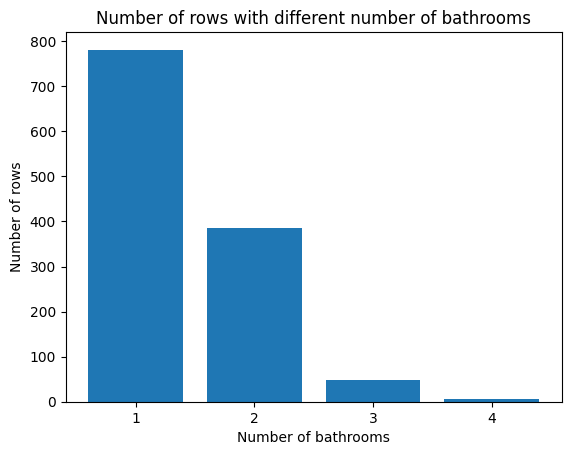

In [81]:
# plot different bathrooms data
plt.bar(["1", "2", "3", "4"], [rent_1bathroom.shape[0], rent_2bathroom.shape[0], rent_3bathroom.shape[0], rent_4bathroom.shape[0]])
plt.xlabel("Number of bathrooms")
plt.ylabel("Number of rows")
plt.title("Number of rows with different number of bathrooms")
plt.savefig("../plots/internal_distribution/distribution2.png")
plt.show()

In [82]:
# get the mean price of different number of bathrooms
mean_1bathroom = rent_1bathroom["price"].mean()
mean_2bathroom = rent_2bathroom["price"].mean()
mean_3bathroom = rent_3bathroom["price"].mean()
mean_4bathroom = rent_4bathroom["price"].mean()

# create a list of mean price
mean_bathroom = [mean_1bathroom, mean_2bathroom, mean_3bathroom, mean_4bathroom]
mean_bathroom

[481.2458386683739, 726.3756476683938, 1038.9583333333333, 1599.0]

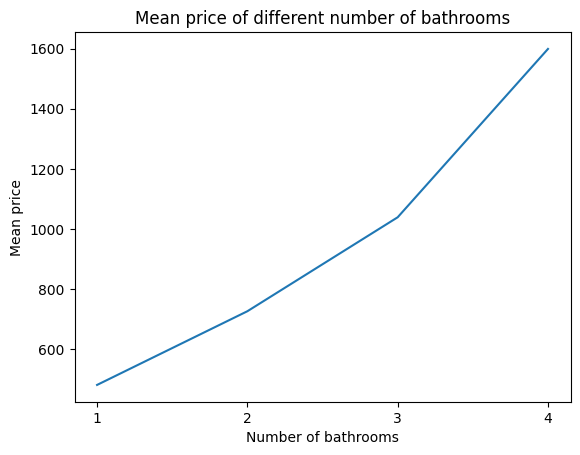

In [83]:
# plot the mean price of different number of bathrooms
plt.plot(["1", "2", "3", "4"], mean_bathroom)
plt.xlabel("Number of bathrooms")
plt.ylabel("Mean price")
plt.title("Mean price of different number of bathrooms")
plt.savefig("../plots/mean_price/mean_price2.png")
plt.show()

In [84]:
# get median price of different number of bathrooms
median_1bathroom = statistics.median(rent_1bathroom["price"])
median_2bathroom = statistics.median(rent_2bathroom["price"])
median_3bathroom = statistics.median(rent_3bathroom["price"])
median_4bathroom = statistics.median(rent_4bathroom["price"])

median_bathroom = [median_1bathroom, median_2bathroom, median_3bathroom, median_4bathroom]
median_bathroom

[450.0, 650.0, 1025.0, 1900.0]

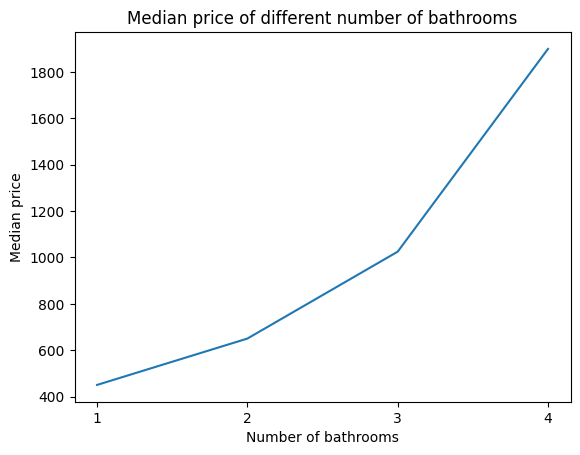

In [85]:
# plot the median price of different number of bathrooms
plt.plot(["1", "2", "3", "4"], median_bathroom)
plt.xlabel("Number of bathrooms")
plt.ylabel("Median price")
plt.title("Median price of different number of bathrooms")
plt.savefig("../plots/median_price/median_price2.png")
plt.show()

In [86]:
# get the growth rate
rate1_bathroom = growth_rate(mean_1bathroom, mean_2bathroom)
rate2_bathroom = growth_rate(mean_2bathroom, mean_3bathroom)
rate3_bathroom = growth_rate(mean_3bathroom, mean_4bathroom)
growth_rate_bathrooms = [rate1_bathroom, rate2_bathroom, rate3_bathroom]
growth_rate_bathrooms

[0.5093650465182279, 0.4303320006229618, 0.5390415079205937]

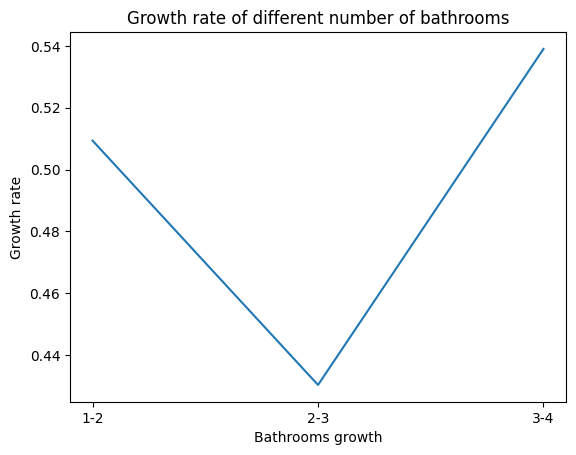

In [87]:
# plot the growth rate
plt.plot(["1-2", "2-3", "3-4"], growth_rate_bathrooms)
plt.xlabel("Bathrooms growth")
plt.ylabel("Growth rate")
plt.title("Growth rate of different number of bathrooms")
plt.savefig("../plots/growth_rate/growth_rate2.png")
plt.show()

### 3 - The influence of Carspaces

In [88]:
# get the different data with different number of parking spaces
carspaces_0 = rent[rent.carspaces == 0]
carspaces_1 = rent[rent.carspaces == 1]
carspaces_2 = rent[rent.carspaces == 2]
carspaces_3 = rent[rent.carspaces == 3]
carspaces_ovr3 = rent[rent.carspaces > 3]

carspaces_list = [carspaces_0.shape[0], carspaces_1.shape[0], carspaces_2.shape[0], carspaces_3.shape[0], carspaces_ovr3.shape[0]]
carspaces_list

[192, 701, 282, 26, 19]

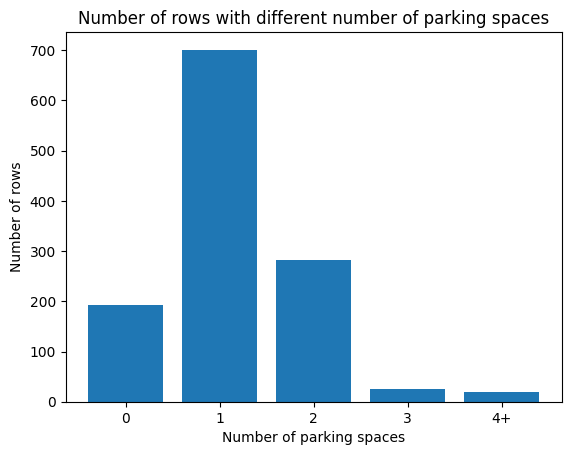

In [89]:
# plot different parking spaces data
plt.bar(["0", "1", "2", "3", "4+"], carspaces_list)
plt.xlabel("Number of parking spaces")
plt.ylabel("Number of rows")
plt.title("Number of rows with different number of parking spaces")
plt.savefig("../plots/internal_distribution/distribution3.png")
plt.show()

In [90]:
# get the mean price of different number of parking spaces
mean_0carspaces = carspaces_0["price"].mean()
mean_1carspaces = carspaces_1["price"].mean()
mean_2carspaces = carspaces_2["price"].mean()
mean_3carspaces = carspaces_3["price"].mean()
mean_ovr3carspaces = carspaces_ovr3["price"].mean()
mean_list_carspaces = [mean_0carspaces, mean_1carspaces, mean_2carspaces, mean_3carspaces, mean_ovr3carspaces]
mean_list_carspaces

[556.6666666666666,
 514.5192582025678,
 749.9539007092199,
 796.7307692307693,
 754.6842105263158]

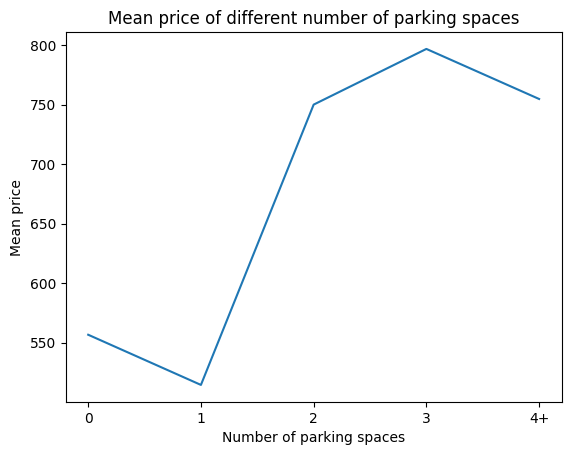

In [91]:
# plot the mean price of different number of parking spaces
plt.plot(["0", "1", "2", "3", "4+"], mean_list_carspaces)
plt.xlabel("Number of parking spaces")
plt.ylabel("Mean price")
plt.title("Mean price of different number of parking spaces")
plt.savefig("../plots/mean_price/mean_price3.png")
plt.show()

In [92]:
# get median price of different number of parking spaces
median_0carspaces = statistics.median(carspaces_0["price"])
median_1carspaces = statistics.median(carspaces_1["price"])
median_2carspaces = statistics.median(carspaces_2["price"])
median_3carspaces = statistics.median(carspaces_3["price"])
median_ovr3carspaces = statistics.median(carspaces_ovr3["price"])

median_list_carspaces = [median_0carspaces, median_1carspaces, median_2carspaces, median_3carspaces, median_ovr3carspaces]
median_list_carspaces

[487.5, 475.0, 650.0, 695.0, 650.0]

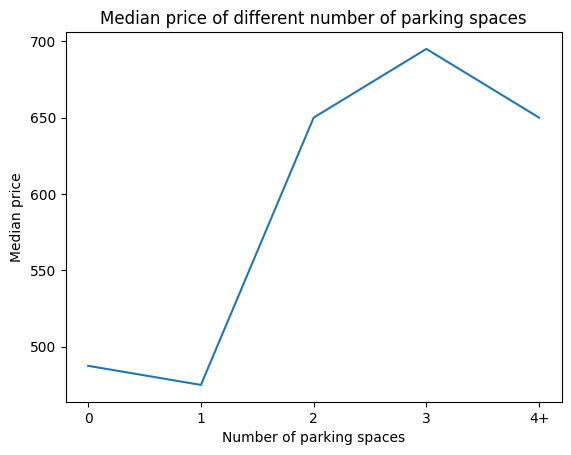

In [93]:
# plot the median price of different number of parking spaces
plt.plot(["0", "1", "2", "3", "4+"], median_list_carspaces)
plt.xlabel("Number of parking spaces")
plt.ylabel("Median price")
plt.title("Median price of different number of parking spaces")
plt.savefig("../plots/median_price/median_price3.png")
plt.show()

In [94]:
# get the growth rate
rate0_carspaces = growth_rate(mean_0carspaces, mean_1carspaces)
rate1_carspaces = growth_rate(mean_1carspaces, mean_2carspaces)
rate2_carspaces = growth_rate(mean_2carspaces, mean_3carspaces)
rate3_carspaces = growth_rate(mean_3carspaces, mean_ovr3carspaces)
growth_rate_carspaces = [rate0_carspaces, rate1_carspaces, rate2_carspaces, rate3_carspaces]
growth_rate_carspaces

[-0.0757139074205368,
 0.45758178873444755,
 0.06237299182964882,
 -0.05277386079245906]

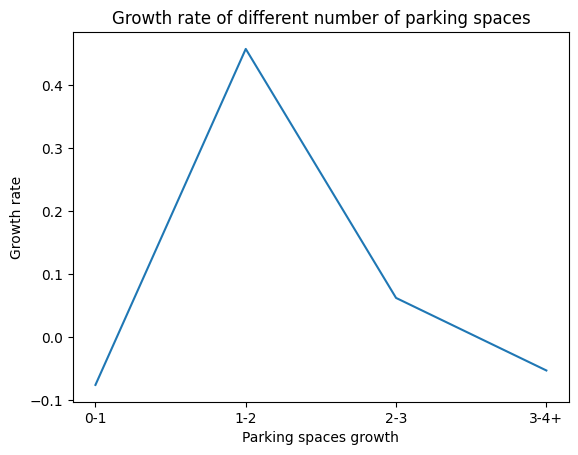

In [95]:
# plot the growth rate
plt.plot(["0-1", "1-2", "2-3", "3-4+"], growth_rate_carspaces)
plt.xlabel("Parking spaces growth")
plt.ylabel("Growth rate")
plt.title("Growth rate of different number of parking spaces")
plt.savefig("../plots/growth_rate/growth_rate3.png")
plt.show()

### 4 - The influence of property types

In [96]:
# see how many different types of property
rent_count = rent.groupby("propertyType").count()
rent_count

,Unnamed: 0,price,state,bathrooms,bedrooms,carspaces,region,suburb,postcode,dateListed,listingSlug,latitude,longitude
propertyType,,,,,,,,,,,,,
ApartmentUnitFlat,745,745,745,745,745,745,745,745,745,745,745,745,745
Duplex,1,1,1,1,1,1,1,1,1,1,1,1,1
House,335,335,335,335,335,335,335,335,335,335,335,335,335
Studio,4,4,4,4,4,4,4,4,4,4,4,4,4
Terrace,1,1,1,1,1,1,1,1,1,1,1,1,1
Townhouse,133,133,133,133,133,133,133,133,133,133,133,133,133
Villa,1,1,1,1,1,1,1,1,1,1,1,1,1


In [97]:
# get the data with different property type
property_ApartmentUnitFlat = rent[rent.propertyType == "ApartmentUnitFlat"]
property_Duplex = rent[rent.propertyType == "Duplex"]
property_House = rent[rent.propertyType == "House"]
property_Studio = rent[rent.propertyType == "Studio"]
property_Townhouse = rent[rent.propertyType == "Townhouse"]
property_Terrace = rent[rent.propertyType == "Terrace"]
property_Villa = rent[rent.propertyType == "Villa"]

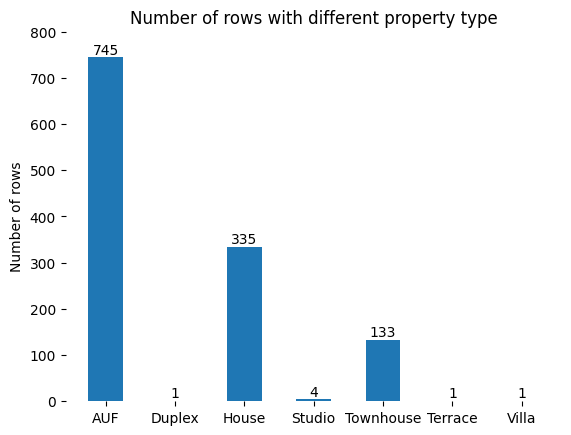

In [98]:
# plot different property type data
fig, ax = plt.subplots()

y_data = [property_ApartmentUnitFlat.shape[0], property_Duplex.shape[0], 
          property_House.shape[0], property_Studio.shape[0], 
          property_Townhouse.shape[0], property_Terrace.shape[0], 
          property_Villa.shape[0]]
x_data = ["AUF", "Duplex", "House", "Studio", "Townhouse", "Terrace", "Villa"]

bar = plt.bar(x_data, y_data, 0.5)

ax.set_title("Number of rows with different property type")
ax.set_ylabel("Number of rows")
ax.set_ylim(0, 800)

for a,b in zip(x_data, y_data):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


fig.savefig("../plots/internal_distribution/distribution4.png")

In [99]:
# get the mean price of different property type
mean_AUF = property_ApartmentUnitFlat["price"].mean()
mean_house = property_House["price"].mean()
mean_townhouse = property_Townhouse["price"].mean()

mean_property = [mean_AUF, mean_house, mean_townhouse]
mean_property

[488.8093959731544, 741.244776119403, 739.4661654135339]

## Part 3 - Relationship between these features

### 1 - Different bedrooms, bathrooms and carspaces with different property types

The different bedrooms data with different property type

In [100]:
# get the different bedrooms data with different property type
bed1_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.bedrooms == 1]
bed2_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.bedrooms == 2]
bed3_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.bedrooms == 3]
bedovr3_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.bedrooms > 3]

bed1_house = property_House[property_House.bedrooms == 1]
bed2_house = property_House[property_House.bedrooms == 2]
bed3_house = property_House[property_House.bedrooms == 3]
bedovr3_house = property_House[property_House.bedrooms > 3]

bed1_townhouse = property_Townhouse[property_Townhouse.bedrooms == 1]
bed2_townhouse = property_Townhouse[property_Townhouse.bedrooms == 2]
bed3_townhouse = property_Townhouse[property_Townhouse.bedrooms == 3]
bedovr3_townhouse = property_Townhouse[property_Townhouse.bedrooms > 3]

In [101]:
# get the mean price of different bedrooms data with different property type
bed1_AUF_mean = bed1_AUF["price"].mean()
bed2_AUF_mean = bed2_AUF["price"].mean()
bed3_AUF_mean = bed3_AUF["price"].mean()
bedovr3_AUF_mean = bedovr3_AUF["price"].mean()

bed1_house_mean = bed1_house["price"].mean()
bed2_house_mean = bed2_house["price"].mean()
bed3_house_mean = bed3_house["price"].mean()
bedovr3_house_mean = bedovr3_house["price"].mean()

bed1_townhouse_mean = bed1_townhouse["price"].mean()
bed2_townhouse_mean = bed2_townhouse["price"].mean()
bed3_townhouse_mean = bed3_townhouse["price"].mean()
bedovr3_townhouse_mean = bedovr3_townhouse["price"].mean()

# create a list
list_AUF_bed = [bed1_AUF_mean, bed2_AUF_mean, bed3_AUF_mean, bedovr3_AUF_mean]
list_house_bed = [bed1_house_mean, bed2_house_mean, bed3_house_mean, bedovr3_house_mean]
list_townhouse_bed = [bed1_townhouse_mean, bed2_townhouse_mean, bed3_townhouse_mean, bedovr3_townhouse_mean]

print(list_AUF_bed)
print(list_house_bed)
print(list_townhouse_bed)

[396.6147859922179, 510.49422632794455, 715.0784313725491, 1180.0]
[396.6666666666667, 595.6024096385543, 723.98125, 919.7191011235955]
[537.5, 571.5277777777778, 746.9142857142857, 976.6]


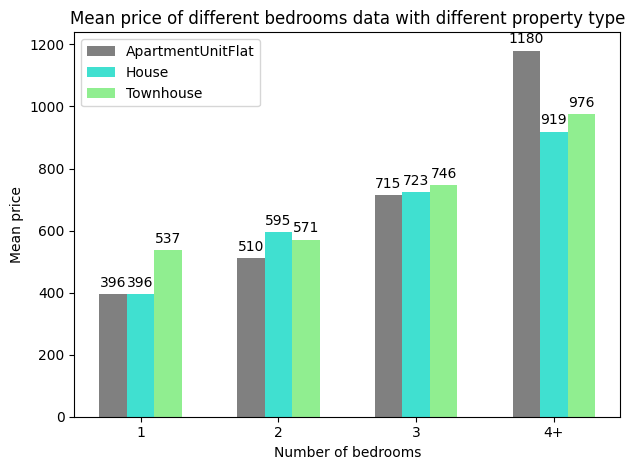

In [102]:
# plot the mean price of different bedrooms data with different property type
import numpy as np

labels = ["1", "2", "3", "4+"]

a = [int(bed1_AUF_mean), int(bed2_AUF_mean), int(bed3_AUF_mean), int(bedovr3_AUF_mean)]
b = [int(bed1_house_mean), int(bed2_house_mean), int(bed3_house_mean), int(bedovr3_house_mean)]
c = [int(bed1_townhouse_mean), int(bed2_townhouse_mean), int(bed3_townhouse_mean), int(bedovr3_townhouse_mean)]

x = np.arange(len(labels))

width = 0.2

fig_bed_mean, ax_bed_mean = plt.subplots()
rects1 = ax_bed_mean.bar(x - width, a, width, label="ApartmentUnitFlat", color="grey")
rects2 = ax_bed_mean.bar(x, b, width, label="House", color="turquoise")
rects3 = ax_bed_mean.bar(x + width, c, width, label="Townhouse", color="lightgreen")

ax_bed_mean.set_ylabel("Mean price")
ax_bed_mean.set_xlabel("Number of bedrooms")
ax_bed_mean.set_title("Mean price of different bedrooms data with different property type")
ax_bed_mean.set_xticks(x)
ax_bed_mean.set_xticklabels(labels)
ax_bed_mean.legend()

def auto_label(rects):
    for rect in rects:
        height = rect.get_height()
        ax_bed_mean.annotate('{}'.format(height),
                             xy=(rect.get_x() + rect.get_width() / 2, height),
                             xytext=(0, 3),
                             textcoords="offset points",
                             ha='center', va='bottom')

auto_label(rects1)
auto_label(rects2)
auto_label(rects3)

fig_bed_mean.tight_layout()
plt.savefig("../plots/internal_relationship/mean1.png")
plt.show()

The different beathrooms data with different property type

In [103]:
# get the mean price of different bathrooms data with different property type
bath1_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.bathrooms == 1]["price"].mean()
bath2_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.bathrooms == 2]["price"].mean()
bath3_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.bathrooms == 3]["price"].mean()
bathovr3_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.bathrooms > 3]["price"].mean()

bath1_house = property_House[property_House.bathrooms == 1]["price"].mean()
bath2_house = property_House[property_House.bathrooms == 2]["price"].mean()
bath3_house = property_House[property_House.bathrooms == 3]["price"].mean()
bathovr3_house = property_House[property_House.bathrooms > 3]["price"].mean()

bath1_townhouse = property_Townhouse[property_Townhouse.bathrooms == 1]["price"].mean()
bath2_townhouse = property_Townhouse[property_Townhouse.bathrooms == 2]["price"].mean()
bath3_townhouse = property_Townhouse[property_Townhouse.bathrooms == 3]["price"].mean()
bathovr3_townhouse = property_Townhouse[property_Townhouse.bathrooms > 3]["price"].mean()

# create a list
bath_AUF = [bath1_AUF, bath2_AUF, bath3_AUF, bathovr3_AUF]
bath_house = [bath1_house, bath2_house, bath3_house, bathovr3_house]
bath_townhouse = [bath1_townhouse, bath2_townhouse, bath3_townhouse, bathovr3_townhouse]

print(bath_AUF)
print(bath_house)
print(bath_townhouse)

[438.6448275862069, 651.275, 1073.75, 1250.0]
[617.9625, 801.42, 1101.5217391304348, 1947.5]
[574.5833333333334, 737.4864864864865, 963.8095238095239, 1425.0]


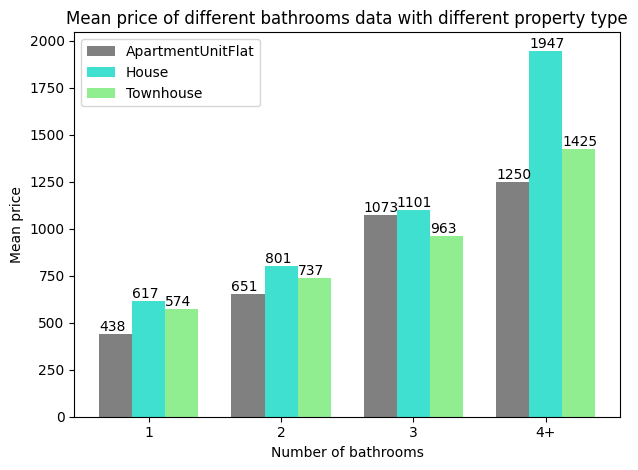

In [104]:
# plot the mean price of different bathrooms data with different property type
def auto_text(rects):
    for rect in rects:
        plt.text(x=rect.get_x(), y=rect.get_height(), s=rect.get_height(), ha='left', va='bottom')

a1 = [int(bath1_AUF), int(bath2_AUF), int(bath3_AUF), int(bathovr3_AUF)]
b1 = [int(bath1_house), int(bath2_house), int(bath3_house), int(bathovr3_house)]
c1 = [int(bath1_townhouse), int(bath2_townhouse), int(bath3_townhouse), int(bathovr3_townhouse)]

width1 = 0.25
x = np.arange(len(labels))

fig_bath_mean, ax_bath_mean = plt.subplots()
rect1 = ax_bath_mean.bar(x - width1, a1, width1, label="ApartmentUnitFlat", color="grey")
rect2 = ax_bath_mean.bar(x, b1, width1, label="House", color="turquoise")
rect3 = ax_bath_mean.bar(x + width1, c1, width1, label="Townhouse", color="lightgreen")

ax_bath_mean.set_ylabel("Mean price")
ax_bath_mean.set_xlabel("Number of bathrooms")
ax_bath_mean.set_title("Mean price of different bathrooms data with different property type")
ax_bath_mean.set_xticks(x)
ax_bath_mean.set_xticklabels(labels)
ax_bath_mean.legend()

auto_label(rect1)
auto_label(rect2)
auto_label(rect3)
auto_text(rect1)
auto_text(rect2)
auto_text(rect3)

fig_bath_mean.tight_layout()
fig_bath_mean.savefig("../plots/internal_relationship/mean2.png")

Different carspaces with different property types

In [105]:
# get the mean price of different parking data with different property type
car0_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.carspaces == 0]["price"].mean()
car1_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.carspaces == 1]["price"].mean()
car2_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.carspaces == 2]["price"].mean()
carovr2_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.carspaces > 2]["price"].mean()

car0_house = property_House[property_House.carspaces == 0]["price"].mean()
car1_house = property_House[property_House.carspaces == 1]["price"].mean()
car2_house = property_House[property_House.carspaces == 2]["price"].mean()
carovr2_house = property_House[property_House.carspaces > 2]["price"].mean()

car0_townhouse = property_Townhouse[property_Townhouse.carspaces == 0]["price"].mean()
car1_townhouse = property_Townhouse[property_Townhouse.carspaces == 1]["price"].mean()
car2_townhouse = property_Townhouse[property_Townhouse.carspaces == 2]["price"].mean()
carovr2_townhouse = property_Townhouse[property_Townhouse.carspaces > 2]["price"].mean()

# create a list
car_AUF = [car0_AUF, car1_AUF, car2_AUF, carovr2_AUF]
car_house = [car0_house, car1_house, car2_house, carovr2_house]
car_townhouse = [car0_townhouse, car1_townhouse, car2_townhouse, carovr2_townhouse]
print(car_AUF)
print(car_house)
print(car_townhouse)

[431.6525423728813, 473.1857142857143, 712.2923076923076, 972.5]
[768.8405797101449, 724.2045454545455, 740.8723404255319, 731.7297297297297]
[835.0, 613.9019607843137, 801.8243243243244, 1005.8333333333334]


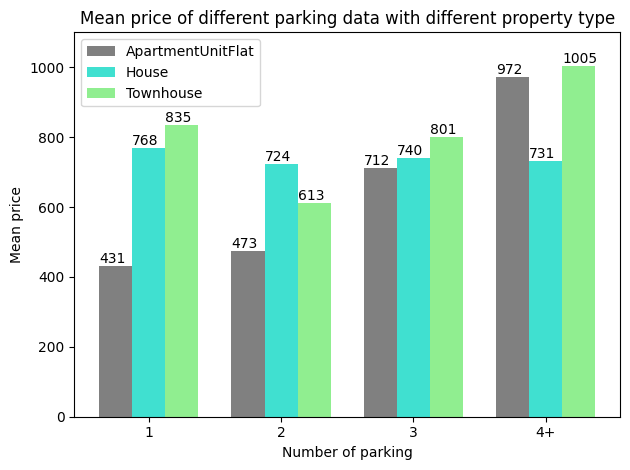

In [106]:
# plot the mean price of different parking data with different property type
a2 = [int(car0_AUF), int(car1_AUF), int(car2_AUF), int(carovr2_AUF)]
b2 = [int(car0_house), int(car1_house), int(car2_house), int(carovr2_house)]
c2 = [int(car0_townhouse), int(car1_townhouse), int(car2_townhouse), int(carovr2_townhouse)]

x = np.arange(len(labels))

fig_car_mean, ax_car_mean = plt.subplots()
rect21 = ax_car_mean.bar(x - width1, a2, width1, label="ApartmentUnitFlat", color="grey")
rect22 = ax_car_mean.bar(x, b2, width1, label="House", color="turquoise")
rect23 = ax_car_mean.bar(x + width1, c2, width1, label="Townhouse", color="lightgreen")

ax_car_mean.set_ylabel("Mean price")
ax_car_mean.set_xlabel("Number of parking")
ax_car_mean.set_title("Mean price of different parking data with different property type")
ax_car_mean.set_xticks(x)
ax_car_mean.set_xticklabels(labels)
ax_car_mean.set_ylim(0, 1100)
ax_car_mean.legend()

auto_label(rect21)
auto_label(rect22)
auto_label(rect23)
auto_text(rect21)
auto_text(rect22)
auto_text(rect23)

fig_car_mean.tight_layout()
fig_car_mean.savefig("../plots/internal_relationship/mean3.png")

### 2 - The impact of a house having several bedrooms and several bathrooms on rent

1b1b? 2b1b? 2b2b? or anything else..

In [107]:
# get the mean price of 1 bedroom and 1 bathroom data with different property type

# b1b1
b1b1_AUF = property_ApartmentUnitFlat[(property_ApartmentUnitFlat.bedrooms == 1) 
                                      & (property_ApartmentUnitFlat.bathrooms == 1)]["price"].mean()
b1b1_house = property_House[(property_House.bedrooms == 1)
                            & (property_House.bathrooms == 1)]["price"].mean()
b1b1_townhouse = property_Townhouse[(property_Townhouse.bedrooms == 1)
                                    & (property_Townhouse.bathrooms == 1)]["price"].mean()
b1b1_list = [b1b1_AUF, b1b1_house, b1b1_townhouse]
print(b1b1_list)

# b2b1
b2b1_AUF = property_ApartmentUnitFlat[(property_ApartmentUnitFlat.bedrooms == 2)
                                      & (property_ApartmentUnitFlat.bathrooms == 1)]["price"].mean()
b2b1_house = property_House[(property_House.bedrooms == 2)
                            & (property_House.bathrooms == 1)]["price"].mean()
b2b1_townhouse = property_Townhouse[(property_Townhouse.bedrooms == 2)
                                    & (property_Townhouse.bathrooms == 1)]["price"].mean()
b2b1_list = [b2b1_AUF, b2b1_house, b2b1_townhouse]
print(b2b1_list)

# b2b2
b2b2_AUF = property_ApartmentUnitFlat[(property_ApartmentUnitFlat.bedrooms == 2)
                                      & (property_ApartmentUnitFlat.bathrooms == 2)]["price"].mean()
b2b2_house = property_House[(property_House.bedrooms == 2)
                            & (property_House.bathrooms == 2)]["price"].mean()
b2b2_townhouse = property_Townhouse[(property_Townhouse.bedrooms == 2)
                                    & (property_Townhouse.bathrooms == 2)]["price"].mean()
b2b2_list = [b2b2_AUF, b2b2_house, b2b2_townhouse]
print(b2b2_list)

[396.015625, 396.6666666666667, 537.5]
[464.9966555183947, 582.4657534246576, 539.7727272727273]
[605.3383458646616, 691.5, 621.4285714285714]


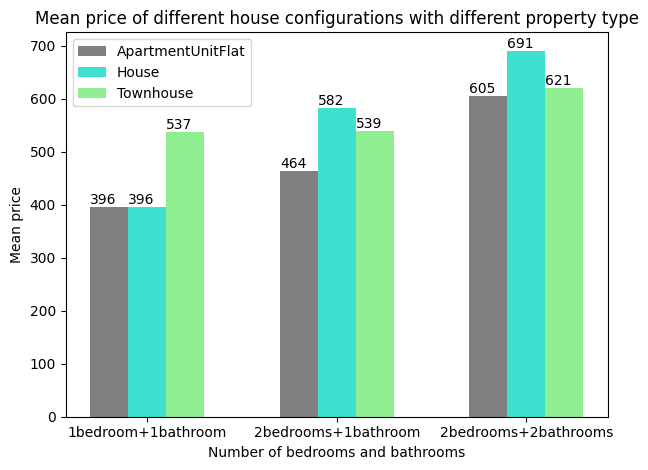

In [108]:
# plot the mean price of 1b1b, 2b1b and 2b2b with different property type
a4 = [int(b1b1_AUF), int(b2b1_AUF), int(b2b2_AUF)]
b4 = [int(b1b1_house), int(b2b1_house), int(b2b2_house)]
c4 = [int(b1b1_townhouse), int(b2b1_townhouse), int(b2b2_townhouse)]

labels4 = ["1bedroom+1bathroom", "2bedrooms+1bathroom", "2bedrooms+2bathrooms"]
x4 = np.arange(len(labels4))

fig4, ax4 = plt.subplots()
rect41 = ax4.bar(x4 - width, a4, width, label="ApartmentUnitFlat", color="grey")
rect42 = ax4.bar(x4, b4, width, label="House", color="turquoise")
rect43 = ax4.bar(x4 + width, c4, width, label="Townhouse", color="lightgreen")

ax4.set_ylabel("Mean price")
ax4.set_xlabel("Number of bedrooms and bathrooms")
ax4.set_title("Mean price of different house configurations with different property type")
ax4.set_xticks(x4)
ax4.set_xticklabels(labels4)
ax4.legend()

auto_label(rect41)
auto_label(rect42)
auto_label(rect43)
auto_text(rect41)
auto_text(rect42)
auto_text(rect43)

fig4.tight_layout()
fig4.savefig("../plots/internal_relationship/1b1b_2b1b_2b2b_with_different_property_type.png")

In [109]:
# bedroom = bathroom
bb_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.bedrooms 
                                    == property_ApartmentUnitFlat.bathrooms]["price"].mean()
bb_house = property_House[property_House.bedrooms == property_House.bathrooms]["price"].mean()
bb_townhouse = property_Townhouse[property_Townhouse.bedrooms
                                  == property_Townhouse.bathrooms]["price"].mean()
bb_list = [bb_AUF, bb_house, bb_townhouse]
print(bb_list)

# bedroom > bathroom
bovr_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.bedrooms
                                      > property_ApartmentUnitFlat.bathrooms]["price"].mean()
bovr_house = property_House[property_House.bedrooms > property_House.bathrooms]["price"].mean()
bovr_townhouse = property_Townhouse[property_Townhouse.bedrooms
                                    > property_Townhouse.bathrooms]["price"].mean()
bovr_list = [bovr_AUF, bovr_house, bovr_townhouse]
print(bovr_list)

# bedroom < bathroom
bbelow_AUF = property_ApartmentUnitFlat[property_ApartmentUnitFlat.bedrooms
                                        < property_ApartmentUnitFlat.bathrooms]["price"].mean()
bbelow_house = property_House[property_House.bedrooms < property_House.bathrooms]["price"].mean()
bbelow_townhouse = property_Townhouse[property_Townhouse.bedrooms
                                      < property_Townhouse.bathrooms]["price"].mean()
bbelow_list = [bbelow_AUF, bbelow_house, bbelow_townhouse]
print(bbelow_list)

[469.71794871794873, 805.5, 762.9629629629629]
[506.8640226628895, 737.1650793650794, 733.4811320754717]
[1025.0, nan, nan]


We do not explore the number of bedrooms are smaller than the number of bathrooms because there are just a few cases.

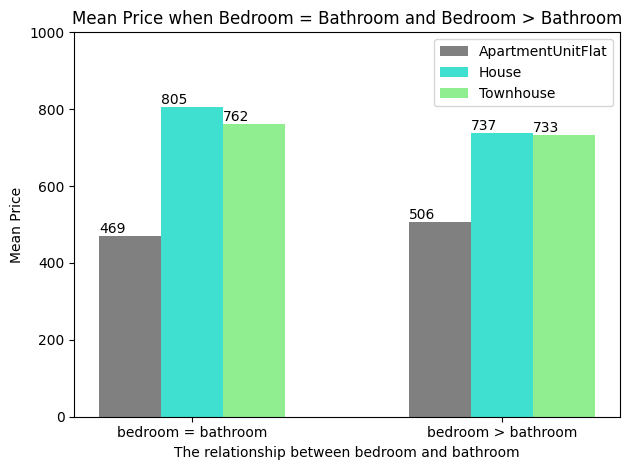

In [110]:
# plot the mean price of the number of bedrooms and bathrooms with different property type
a3 = [int(bb_AUF), int(bovr_AUF)]
b3 = [int(bb_house), int(bovr_house)]
c3 = [int(bb_townhouse), int(bovr_townhouse)]

label = ['bedroom = bathroom', 'bedroom > bathroom']
x2 = np.arange(len(label))

fig_bb, ax_bb = plt.subplots()
rect31 = ax_bb.bar(x2 - width, a3, width, label='ApartmentUnitFlat', color='grey')
rect32 = ax_bb.bar(x2, b3, width, label='House', color='turquoise')
rect33 = ax_bb.bar(x2 + width, c3, width, label='Townhouse', color='lightgreen')

ax_bb.set_ylabel('Mean Price')
ax_bb.set_xlabel('The relationship between bedroom and bathroom')
ax_bb.set_title('Mean Price when Bedroom = Bathroom and Bedroom > Bathroom')
ax_bb.set_xticks(x2)
ax_bb.set_xticklabels(label)
ax_bb.set_ylim(0, 1000)
ax_bb.legend()

auto_label(rect31)
auto_label(rect32)
auto_label(rect33)
auto_text(rect31)
auto_text(rect32)
auto_text(rect33)

fig_bb.tight_layout()
fig_bb.savefig('../plots/internal_relationship/both_of_bedrooms_and_bathrooms_affect_rent.png')